# Libraries

In [1]:
library(dagitty)
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

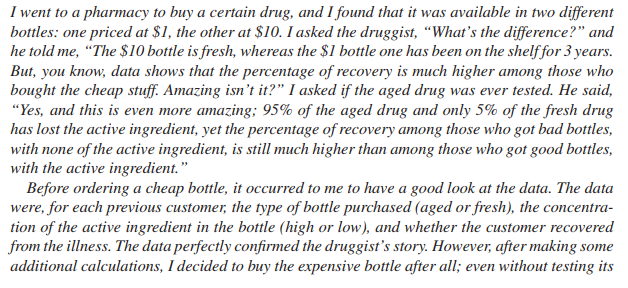

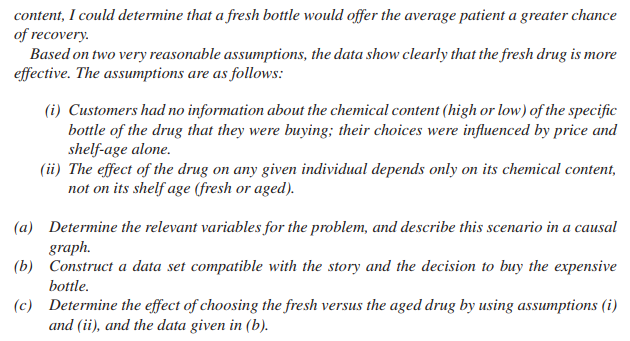

# Solution

## (a)

Let:

* $X$: Drug Price, cheap vs expensive
* $Y$: Recovery
* $Z$: Active Ingredient, low vs high

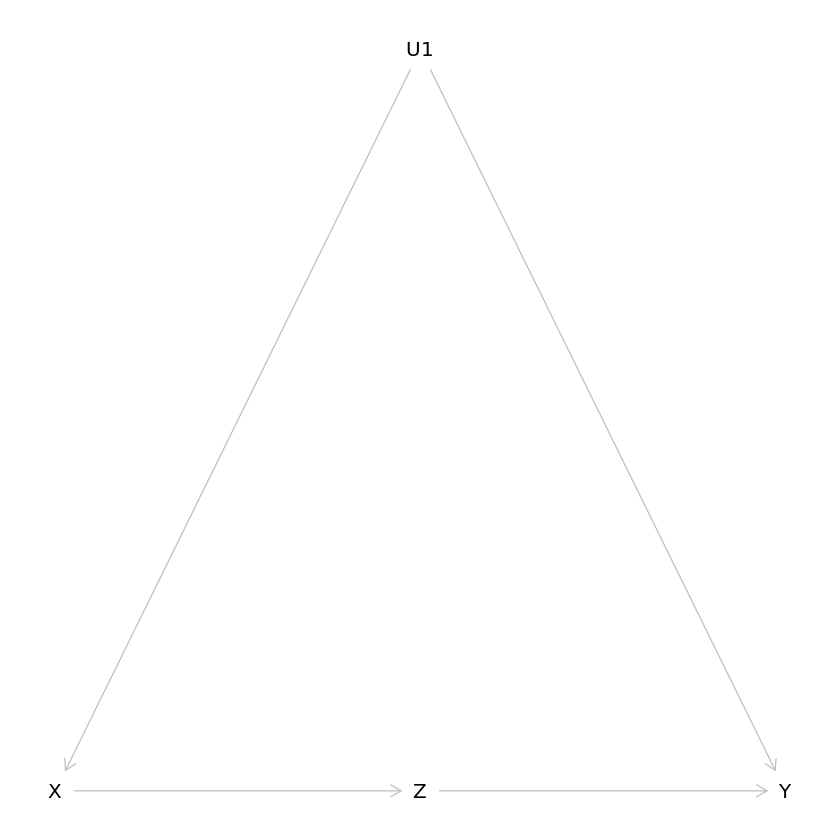

In [2]:
g = dagitty('dag {
    U1 -> X
    U1 -> Y
    X -> Z
    Z -> Y
    U1 [latent]
    X [exposure]
    Y [outcome]
}')

coordinates(g) <- list(x = c(U1 = 2, X = 1, Y = 3, Z = 2),
                       y = c(U1 = -1, X = 0, Y = 0, Z = 0))
plot(g)

Notes:

* U1: We hypothesize that there is an unobserved factor that influences both price, $X$ and recovery, $Y$, e.g. people influenced by price have more health problems.

## (b)

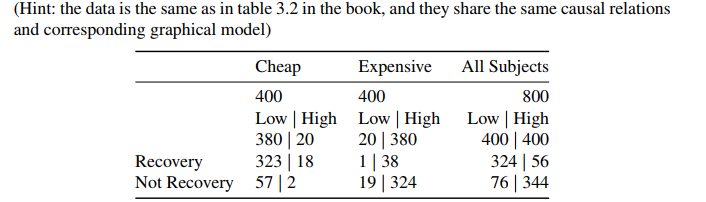

## (c)

Using the [front door criterion](./study_question_3.4.1.ipynb) with $Z$:

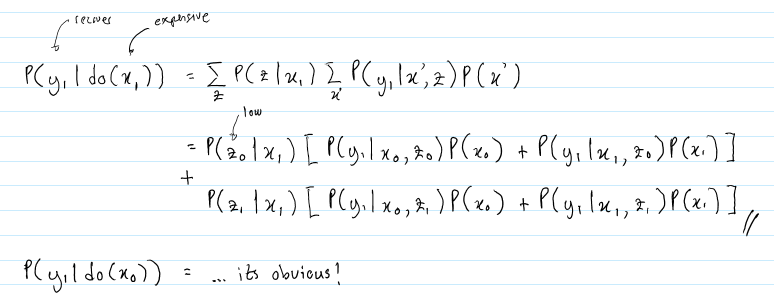

Workings:

In [3]:
# low does given cheap
p_z0_given_x0 <- 380/400

# high does given cheap
p_z1_given_x0 <- 20/400

In [4]:
# low does given expensive
p_z0_given_x1 <- 20/400

# high does given expensive
p_z1_given_x1 <- 380/400

# recover given cheap and low dose
p_y1_given_x0_z0 <- 323/380

# recover given expensive and low dose
p_y1_given_x1_z0 <- 1/20

# recover given cheap and high dose
p_y1_given_x0_z1 <- 18/20

# recover given expensive and high dose
p_y1_given_x1_z1 <- 38/380

# cheap
p_x0 <- 400/800
# expensive
p_x1 <- 400/800

Probability recover given intervene expensive drug:

In [5]:
p_y1_given_do_x1 <- p_z0_given_x1 * (p_y1_given_x0_z0 * p_x0 + p_y1_given_x1_z0 * p_x1) +
    p_z1_given_x1 * (p_y1_given_x0_z1 * p_x0 + p_y1_given_x1_z1 * p_x1)

p_y1_given_do_x1

[1] 0.4975

Probability recover given cheap drug:

In [6]:
p_y1_given_do_x0 <- p_z0_given_x0 * (p_y1_given_x0_z0 * p_x0 + p_y1_given_x1_z0 * p_x1) +
    p_z1_given_x0 * (p_y1_given_x0_z1 * p_x0 + p_y1_given_x1_z1 * p_x1)

p_y1_given_do_x0

[1] 0.4525

ACE:

In [7]:
ACE <- p_y1_given_do_x1 - p_y1_given_do_x0
ACE

[1] 0.045

In [8]:
ACE > 0

[1] TRUE

Therefore, we have higher likelihood of recovery we take the expensive drug $X=x_1$ compared to the cheap drug, $X = x_0$.